## To Gather data from multiple sources to perform Data Wrangling Analysis.


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import requests
from PIL import Image
from io import BytesIO
import tweepy
import json
from pprint import pprint

## Gathering twitter archive Data

In [ ]:
# To read the file
df=pd.read_csv('twitter-archive-enhanced.csv')
df.info()

In [ ]:
df.head()

## Gathering twitter counts Data

In [ ]:
# To Download the Required data from Twitter and save it in tweet_json as a Json file. 

consumer_key = 'x'
consumer_secret = 'x'
access_token = 'x-x'
access_secret = 'x'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
with open('tweet_json.txt', 'w') as file: 

    for tweet_id in df.tweet_id:
        try:
            tweet = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet._json, file)
        except:
            print('This tweet ID: {0}, raised an error.'.format(tweet_id))

In [ ]:
# To import Json Decoder to split each Json data and Parse it
from json import JSONDecoder
from functools import partial


def json_parse(fileobj, decoder=JSONDecoder(), buffersize=2048):
    buffer = ''
    for chunk in iter(partial(fileobj.read, buffersize), ''):
         buffer += chunk
         while buffer:
             try:
                 result, index = decoder.raw_decode(buffer)
                 yield result
                 buffer = buffer[index:]
             except ValueError:
                 # Not enough data to decode, read more
                 break

In [ ]:
# Convert the Json Format and extract retweet_count and Favorite_count and make a DataFrame
## Readin a Json File
df_extra=[]
with open('tweet_json.txt', 'r') as infh:
    for data in json_parse(infh):
        id=data['id']
        retweet_count=data['retweet_count']
        favorite_count=data['favorite_count']
        
        df_extra.append({'tweet_id':int(id),
                        'retweet_count':int(retweet_count),
                        'favorite_count':int(favorite_count)})

In [ ]:
## create dataframes from dictionaries

df_counts=pd.DataFrame(df_extra,columns=['tweet_id','retweet_count','favorite_count'])

In [ ]:
df_counts.to_csv('counts.csv')

## Gathering Image Prediction Data

In [ ]:
## Extract image-predictions as Tsv using requests method

url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

with open("records.tsv",mode='wb') as record_file:
    record_file.write(response.content)

In [ ]:
image_prediction=pd.read_csv('records.tsv',sep='\t')

In [ ]:
# Checking whether our image_prediction 1 and 2 matches.
image_prediction[image_prediction.p1==image_prediction.p2]

In [ ]:
### Three Types of files are image_prediction,df_counts,df

## The data has been gathered from twitter and prediction website and stored in csv format. This data is now used for cleaning. We access quality issues in the data and then clean it using python.

In [73]:
# importing python Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as mp
% matplotlib inline

In [74]:
# Reading Files
image_prediction=pd.read_csv('records.tsv',sep='\t')
twitter=pd.read_csv('twitter-archive-enhanced.csv')
counts=pd.read_csv('counts.csv')

In [75]:
# Copying Files
image_clean=image_prediction.copy()
twitter_clean=twitter.copy()
counts_clean=counts.copy()

## Visual Assessment

In [76]:
# Analyzing the data
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [77]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Programmatic Assessment

In [78]:
#Understanding Image_clean.p1
image_clean.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
teddy                         18
Maltese_dog                   18
Eskimo_dog                    18
beagle                        18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [79]:
# Understaniding Inage_clean.p2 data
image_clean.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
malinois                           20
miniature_pinscher                 20
chow                               20
Samoyed                            20
toy_terrier                        20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [80]:
# Understaniding Image_clean.p3 data
image_clean.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
Pomeranian                        29
toy_poodle                        29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

This data type is quite good. No cleaning is necessary for now. Since there are no errors according to me. 
Although We dont need certain columns such as img_num. We may need P1_conf ,P2_conf, P3_conf. So we dont 
need to remove them yet.

In [81]:
### Understanding Twitter_clean data
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [82]:
#Checking the null data
twitter_clean[twitter_clean.in_reply_to_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [83]:
twitter_clean.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

## Corrections to be made to the table
Access for twitter_clean table

1.remove in_reply_to_status_id
2.remove in_reply_to_user_id
3.convert timestamp to date format
4.Remove retweeted_status_id
5.Remove retweeted_status_user_id
6.Remove retweeted_status_timestamp
7.Melt the doggo floofer pupper	puppo into single column and remove duplicates in it.
8.Replace None in Names
9.check whether rating numerator and denominator matches with the extracted number in Text.
10.Remove Duplicates.
11.Change the rating numerator and denominator data type
12.Convert the Text to lower Case for uniform Analysis


In [84]:
counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 4 columns):
Unnamed: 0        2342 non-null int64
tweet_id          2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(4)
memory usage: 73.3 KB


In [85]:
counts_clean.head()

,Unnamed: 0,tweet_id,retweet_count,favorite_count
0,0,892420643555336193,8491,38520
1,1,892177421306343426,6244,33024
2,2,891815181378084864,4139,24853
3,3,891689557279858688,8605,41896
4,4,891327558926688256,9348,40044


## corrections to be made to the counts_clean table
Access for counts_clean

1. Remove Unnamed column
2. merge table with twitter_clean
3. Change datatype for Retweet count and Favorite count

## Tidiness 

### Data Cleaning for counts_clean
### Define: 
1.Remove Unnamed in counts_clean table
2.Merge table with Twitter_clean 
        

### code:

In [86]:
counts_clean=counts_clean.drop('Unnamed: 0',axis=1)

### Test:

In [87]:
counts_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8491,38520
1,892177421306343426,6244,33024
2,891815181378084864,4139,24853
3,891689557279858688,8605,41896
4,891327558926688256,9348,40044


### Define: 
Merge retweet_count and favorite count with twitter_clean table 

### code:

In [88]:
twitter_clean=pd.merge(twitter_clean,counts_clean,on='tweet_id',how='left')

### Test:

In [89]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8491.0,38520.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6244.0,33024.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4139.0,24853.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8605.0,41896.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9348.0,40044.0


### Define:

Merge retweet_count and favorite count with twitter_clean table

### Code:

In [90]:
twitter_clean=pd.merge(twitter_clean,image_clean,on='tweet_id',how='left')

### Test:

In [91]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Define: 
Drop columns which we wont need in_reply_to_status_id,userid,retweeted_status_id,userid,
retweeted_status_timestamp,jpg_url

### code

In [92]:

twitter_clean=twitter_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
                                  'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','jpg_url'],axis=1)

### Test

In [93]:

twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
retweet_count         2342 non-null float64
favorite_count        2342 non-null float64
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-

## Define 

Melt the data regarding doggo, floofer, pupper, puppo to a single column and create a new column as stage 
based on the keyword

### code

In [94]:
twitter_clean=pd.melt(twitter_clean,id_vars=['tweet_id','timestamp','source','text','expanded_urls','rating_numerator',
                                       'rating_denominator','name','retweet_count','favorite_count','img_num','p1',
                                      'p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],
                                        var_name='Type',value_name='stage')
#twitter_clean['keyword_present']=twitter_clean.dogs!='None'
twitter_clean=twitter_clean[~(twitter_clean.tweet_id.duplicated())]

### Test

In [95]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
retweet_count         2342 non-null float64
favorite_count        2342 non-null float64
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
Type                  2356 non

### Define Remove Type column

### Code

In [96]:
twitter_clean.drop(['Type'],axis=1,inplace=True)

### Test

In [97]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8491.0,38520.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6244.0,33024.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4139.0,24853.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8605.0,41896.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9348.0,40044.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


### Now Tidiness is Completed. We can move on to Data Quality.

## Data Quality for image_clean and twitter_clean

In [98]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Data Quality for Twitter_Clean

### Define: Renaming column name


### code:

In [99]:
twitter_clean.rename(columns={'p1': 'Predict_p1', 'p1_conf': 'Predict_1_conf','p1_dog': 'Predict_1_dog',
                            'p2': 'Predict_p2', 'p2_conf': 'Predict_2_conf','p2_dog': 'Predict_2_dog',
                            'p3': 'Predict_p3', 'p3_conf': 'Predict_3_conf','p3_dog': 'Predict_3_dog'}, inplace=True)

### Test:

In [100]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,Predict_p1,Predict_1_conf,Predict_1_dog,Predict_p2,Predict_2_conf,Predict_2_dog,Predict_p3,Predict_3_conf,Predict_3_dog,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8491.0,38520.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6244.0,33024.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4139.0,24853.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8605.0,41896.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9348.0,40044.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


In [101]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
retweet_count         2342 non-null float64
favorite_count        2342 non-null float64
img_num               2075 non-null float64
Predict_p1            2075 non-null object
Predict_1_conf        2075 non-null float64
Predict_1_dog         2075 non-null object
Predict_p2            2075 non-null object
Predict_2_conf        2075 non-null float64
Predict_2_dog         2075 non-null object
Predict_p3            2075 non-null object
Predict_3_conf        2075 non-null float64
Predict_3_dog         2075 non-null object
stage                 2356 non

### Define: Convert timestamp to date format

### code

In [102]:

twitter_clean.timestamp=pd.to_datetime(twitter_clean.timestamp)

### test

In [103]:

twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
retweet_count         2342 non-null float64
favorite_count        2342 non-null float64
img_num               2075 non-null float64
Predict_p1            2075 non-null object
Predict_1_conf        2075 non-null float64
Predict_1_dog         2075 non-null object
Predict_p2            2075 non-null object
Predict_2_conf        2075 non-null float64
Predict_2_dog         2075 non-null object
Predict_p3            2075 non-null object
Predict_3_conf        2075 non-null float64
Predict_3_dog         2075 non-null object
stage                 

In [104]:
twitter_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,Predict_p1,Predict_1_conf,Predict_1_dog,Predict_p2,Predict_2_conf,Predict_2_dog,Predict_p3,Predict_3_conf,Predict_3_dog,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8491.0,38520.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6244.0,33024.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4139.0,24853.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8605.0,41896.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9348.0,40044.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,3096.0,20086.0,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,2059.0,11760.0,...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,18824.0,65067.0,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,4251.0,27625.0,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,7373.0,31706.0,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo


### Define Change the None values to Nan because it is of no use

### code

In [105]:

twitter_clean.name.replace('None', np.nan,inplace=True)

### Test

In [106]:
# Test
twitter_clean.name.value_counts()

a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
Sadie         8
the           8
Buddy         7
Daisy         7
Bailey        7
an            7
Toby          7
Dave          6
Jack          6
Stanley       6
Leo           6
Jax           6
Rusty         6
Koda          6
Milo          6
Bella         6
Scout         6
Oscar         6
Oakley        5
Phil          5
             ..
Charleson     1
Rascal        1
Wiggles       1
Pherb         1
Striker       1
Harnold       1
Fynn          1
Tonks         1
Bookstore     1
Sweets        1
Evy           1
Tug           1
Sailor        1
Gustav        1
Mosby         1
Jeffrie       1
Aiden         1
Zooey         1
Bilbo         1
Chesney       1
Fiji          1
Doobert       1
Chaz          1
Monkey        1
Pinot         1
Snoopy        1
Clarkus       1
Bloo          1
Oddie         1
Stella        1
Name: name, Length: 956,

### Define change retweet count and favorite count to int

### code

In [107]:
twitter_clean.retweet_count=twitter_clean.retweet_count.fillna(0).astype(int)
twitter_clean.favorite_count=twitter_clean.favorite_count.fillna(0).astype(int)

### test

In [108]:

twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,Predict_p1,Predict_1_conf,Predict_1_dog,Predict_p2,Predict_2_conf,Predict_2_dog,Predict_p3,Predict_3_conf,Predict_3_dog,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8491,38520,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6244,33024,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4139,24853,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8605,41896,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9348,40044,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


In [109]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  1611 non-null object
retweet_count         2356 non-null int64
favorite_count        2356 non-null int64
img_num               2075 non-null float64
Predict_p1            2075 non-null object
Predict_1_conf        2075 non-null float64
Predict_1_dog         2075 non-null object
Predict_p2            2075 non-null object
Predict_2_conf        2075 non-null float64
Predict_2_dog         2075 non-null object
Predict_p3            2075 non-null object
Predict_3_conf        2075 non-null float64
Predict_3_dog         2075 non-null object
stage                 2356

### Define

Rate_numerator and Denominator should match up with the text value.

### Code

In [110]:
import re

In [111]:
text=twitter_clean.text.str.extract(r'(\d+(\.\d+))\/(\d+)').astype(float)
twitter_clean = pd.concat([twitter_clean, text], axis=1, join_axes=[text.index])

In [112]:
twitter_clean.rename(columns={ 0: 'corr_1', 1: 'corr_2', 2: 'corr_3'}, inplace=True)

In [113]:
new=twitter_clean[twitter_clean.corr_1.notna()].tweet_id
for i in new.index:
    twitter_clean.loc[i, 'rating_numerator'] = twitter_clean.loc[i,'corr_1']
    twitter_clean.loc[i, 'rating_denominator'] = twitter_clean.loc[i,'corr_3']

In [114]:
twitter_clean=twitter_clean.drop(['corr_1','corr_2',
                                  'corr_3'],axis=1)

### Test

In [44]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,Predict_p1,Predict_1_conf,Predict_1_dog,Predict_p2,Predict_2_conf,Predict_2_dog,Predict_p3,Predict_3_conf,Predict_3_dog,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,8491,38520,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,6244,33024,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,4139,24853,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,8605,41896,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,9348,40044,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


### Define

In [ ]:
Convert the Text column to lower case.

### Code

In [115]:
twitter_clean['text']=twitter_clean['text'].str.lower()

### Test

In [71]:
twitter_clean['text']

0       this is phineas. he's a mystical boy. only eve...
1       this is tilly. she's just checking pup on you....
2       this is archie. he is a rare norwegian pouncin...
3       this is darla. she commenced a snooze mid meal...
4       this is franklin. he would like you to stop ca...
5       here we have a majestic great white breaching ...
6       meet jax. he enjoys ice cream so much he gets ...
7       when you watch your owner call another dog a g...
8       this is zoey. she doesn't want to be one of th...
9       this is cassie. she is a college pup. studying...
10      this is koda. he is a south australian decksha...
11      this is bruno. he is a service shark. only get...
12      here's a puppo that seems to be on the fence a...
13      this is ted. he does his best. sometimes that'...
14      this is stuart. he's sporting his favorite fan...
15      this is oliver. you're witnessing one of his m...
16      this is jim. he found a fren. taught him how t...
17      this i

In [117]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  1611 non-null object
retweet_count         2356 non-null int64
favorite_count        2356 non-null int64
img_num               2075 non-null float64
Predict_p1            2075 non-null object
Predict_1_conf        2075 non-null float64
Predict_1_dog         2075 non-null object
Predict_p2            2075 non-null object
Predict_2_conf        2075 non-null float64
Predict_2_dog         2075 non-null object
Predict_p3            2075 non-null object
Predict_3_conf        2075 non-null float64
Predict_3_dog         2075 non-null object
stage                 

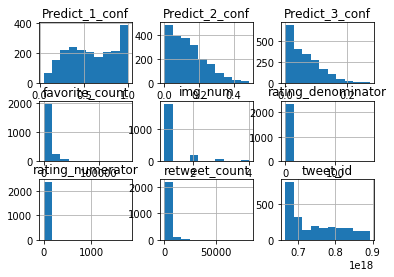

In [116]:
#Visual Representation for Twitter_clean
twitter_clean.hist();

Twitter_clean and Image_clean is the new dataSet for data Visualization

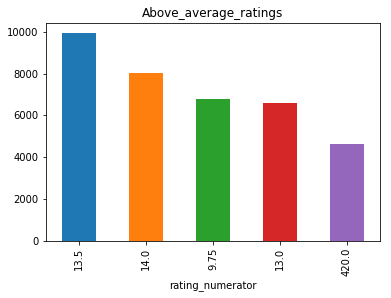

In [46]:
# Understanding the rating numerator with respect to retweet_count
groups=twitter_clean.groupby('rating_numerator').retweet_count.mean()
groups.nlargest(5).plot(kind='bar',title='Above_average_ratings');

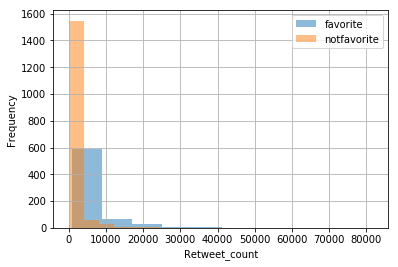

In [47]:
#Finding the Relationship between Favorite Count and Retweet Data
pop=(twitter_clean.favorite_count)>(twitter_clean.favorite_count.mean())
npop=(twitter_clean.favorite_count)<(twitter_clean.favorite_count.mean())
twitter_clean.retweet_count[pop].hist(alpha=0.5,label='favorite')
twitter_clean.retweet_count[npop].hist(alpha=0.5,label='notfavorite')
mp.xlabel("Retweet_count",fontsize=10)
mp.ylabel("Frequency",fontsize=10)
mp.legend();


From this we can see that favorite posts has more retweet count than not favorite ones. We can see that not favorite has
more of zero retweet count and it reduces the overall percentage of not favorite ones. 

In [48]:
#Extracting the year and month data from Timestamp
twitter_clean['year'] = pd.DatetimeIndex(twitter_clean['timestamp']).year
twitter_clean['month'] = pd.DatetimeIndex(twitter_clean['timestamp']).month

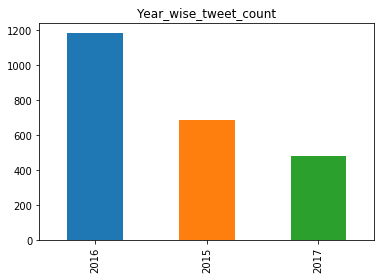

In [49]:
#Year_wise_tweet_count
year_wise_count=twitter_clean.year.value_counts()
year_wise_count.plot(kind='bar',title='Year_wise_tweet_count');

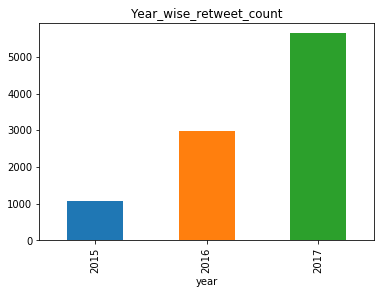

In [50]:
#Year_wise_retweet_count
year_wise=twitter_clean.groupby('year')['retweet_count'].mean()
year_wise.plot(kind='bar',title='Year_wise_retweet_count');

From this we can see that there is a change in pattern from tweets and retweets according to years. The number of retweets
increases as year progressed. This means that tweets that were created before have been retweeted in the coming years. 
This counts will be increasing in the coming years as well.

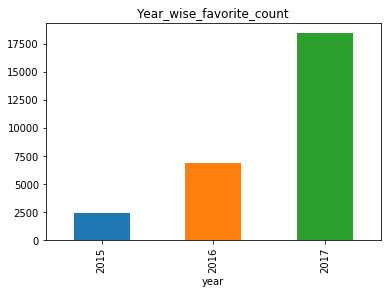

In [51]:
# Understandin the year and Favorite Count
year_wise=twitter_clean.groupby('year')['favorite_count'].mean()
year_wise.plot(kind='bar',title='Year_wise_favorite_count');

The Year_wise favorite count also forms the same pattern compared to the Year_wise_retweet count.

In [52]:
## Month wise distribution 

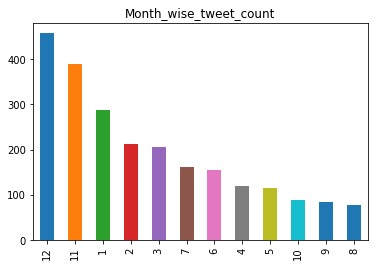

In [53]:
#Understanding the Month and Tweet count
month_wise_count=twitter_clean.month.value_counts()
month_wise_count.plot(kind='bar',title='Month_wise_tweet_count');

We can see a pattern in which december is the most highly tweeted month followed by November and january.
This may be due to the reason of Thanksgiving, christmas and newyear present in those month. 

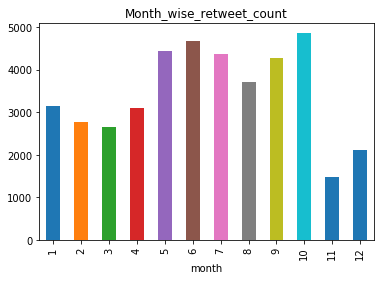

In [54]:
#Understanding the Month and Retweet count
month_wise=twitter_clean.groupby('month')['retweet_count'].mean()
month_wise.plot(kind='bar',title='Month_wise_retweet_count');

This follows the same pattern where in November and December the tweets where created and in the rest it was retweeted. 

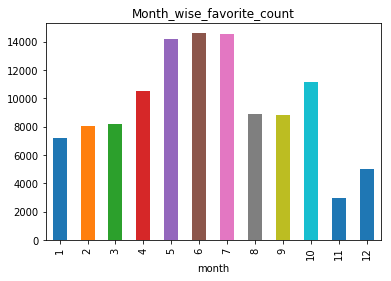

In [55]:
# Understanding month wise Favorite Count
month_wise=twitter_clean.groupby('month')['favorite_count'].mean()
month_wise.plot(kind='bar',title='Month_wise_favorite_count');

From both month and year we can see that favorite count is based on retweets than the tweets themselves. From the graph
we can visually prove that favorite count is based on retweets only.

In [220]:
# Relationship Between Favorite and Retweet Count with Scatter Plot

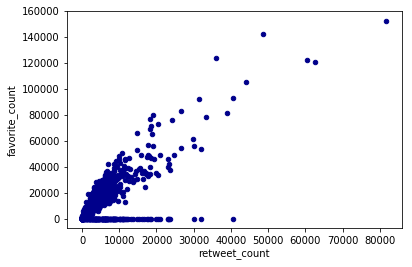

In [221]:
twitter_clean.plot.scatter(x='retweet_count',y='favorite_count',c='DarkBlue');

From this we can see that there is a pattern between retweet and favorite count. It has positive correlation when we
remove the zeroes which are basically null values.

In [223]:
#Converting the Cleaned files to csv Format
twitter_clean.to_csv('twitter_clean_final.csv',index=False)

In [224]:
# Understanding the Predict_1 dog and Predict_1_conf
p1_mean=twitter_clean.Predict_1_dog.mean()
p1_conf=twitter_clean.Predict_1_conf.mean()

In [225]:
# Understanding the Predict_2 dog and Predict_2_conf
p2_mean=twitter_clean.Predict_2_dog.mean()
p2_conf=twitter_clean.Predict_2_conf.mean()

In [226]:
# Understanding the Predict_3 dog and Predict_3_conf
p3_mean=twitter_clean.Predict_3_dog.mean()
p3_conf=twitter_clean.Predict_3_conf.mean()

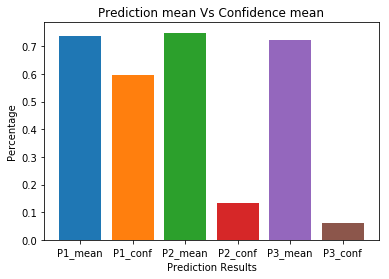

In [227]:
#Visualizing the Plots to Understand the Difference
mp.bar('P1_mean',p1_mean)
mp.bar('P1_conf',p1_conf)
mp.bar('P2_mean',p2_mean)
mp.bar('P2_conf',p2_conf)
mp.bar('P3_mean',p3_mean)
mp.bar('P3_conf',p3_conf)
mp.ylabel('Percentage')
mp.xlabel('Prediction Results')
mp.title('Prediction mean Vs Confidence mean');

From this we can see that 2nd prediction has high value of 74% followed by 1st and 3rd. But we can also see that 
the confidence of 2nd prediction is kind of low compared to 1st one. From this we can suggest that Prediction 1 has 
high confidence and high prediction algorithm compared to others.